[Indice](index.ipynb) | Previo: [ProblemaNCuerpos.SolucionNumerica](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb) | 

### 6.4.5. Constantes de movimiento y teorema del virial
<a id='ncuerpos_numerico_constantes_virial'></a>

Una interesante primera "aplicación" de la solución numérica al problema de los N cuerpos vista en estas secciones, es la de verificar "experimentalmente" los resultados analíticos descritos en la [Sección *¿Solución analítica?*](Not Found#solucione_analitica) y en la [Sección *Energía y virial*](06.03.00.00.ProblemaNCuerpos.TeoremaVirial.ipynb#ncuerpos_virial).

Para ello estudiaremos un sistema de 5 partículas con masas, posiciones y velocidades generadas al azar.  La solución numérica a las e.d.m.r. del sistema, obtenida con los métodos vistos en esta sección, nos permitirá obtener las listas de sus posiciones y velocidades para distintos valores del tiempo.  Con estas listas podremos calcular y graficar los valores de las constantes de movimiento, momento lineal, momento angular, energía y de las cantidades críticas para el teorema del virial.  

Comencemos pues por generar las condiciones iniciales del sistema usando, entre otras cosas, la rutina `sistema_a_Y` del Alg. ([sistema_a_Y](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb#code:sistema_a_Y)) y las rutinas de generación de números aleatorios que usamos en la [Sección *Centro de masa*](05.02.02.00.Mecanica.Dinamica.SistemaParticulas.ipynb#centro_masa):

In [4]:
#Importa todos las rutinas y constantes de otras libretas
from pymcel.export import *

<a id='code:ncuerpos_constantes_condiciones_iniciales'></a>

In [3]:
#Número de partículas
N=5

#Generación de las condiciones para cada partícula
from numpy.random import uniform,seed
seed(7)

#Condiciones iniciales
sistema=[]
for i in range(N):
    particula=dict(
        m=uniform(0.0,1.0),
        r=uniform(-1.0,1.0,size=3),
        v=uniform(-1.0,1.0,size=3)
    )
    sistema+=[particula]

N,mus,Y0s=sistema_a_Y(sistema)

#Tiempos
from numpy import linspace
Nt=100
ts=linspace(0.0,10.0,Nt)

In [28]:
print(f"N = {N}")
print(f"mus = {mus}")
print(f"Y0s = {Y0s}")

N = 5
mus = [0.07630829 0.07205113 0.2881456  0.9501295  0.66901324]
Y0s = [ 5.59837584e-01 -1.23181537e-01  4.46930356e-01 -4.63122040e-01
 -2.34998349e-04  3.58459992e-01  8.19187055e-01 -5.73229293e-01
 -9.57520764e-02 -5.39394242e-01  9.69798385e-02  8.18256750e-01
 -6.44942805e-02 -5.90301819e-01 -1.84682218e-02  9.55979024e-01
  7.69917408e-02  2.24092732e-03  6.07478072e-01 -2.38117734e-01
 -8.68127306e-01  8.62412039e-01 -9.50201545e-01  2.01097835e-01
 -7.33661108e-01  4.68251613e-02  5.00819718e-01 -2.55230621e-01
 -4.51976903e-02 -2.68219228e-01]


Ahora podemos resolver las ecuaciones de movimiento y extraer las posiciones y velocidades de las partículas:

In [29]:
#Solución
from scipy.integrate import odeint
solucion=odeint(edm_ncuerpos,Y0s,ts,args=(N,mus))

#Extracción de las posiciones y velocidades
rs,vs=solucion_a_estado(solucion,N,Nt)

Una gráfica del movimiento de las partículas en tres dimensiones se puede obtener usando la rutina `plot_ncuerpos_3d` que definimos en el Alg. ([plot_ncuerpos_3d](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb#code:plot_ncuerpos_3d)):

In [30]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


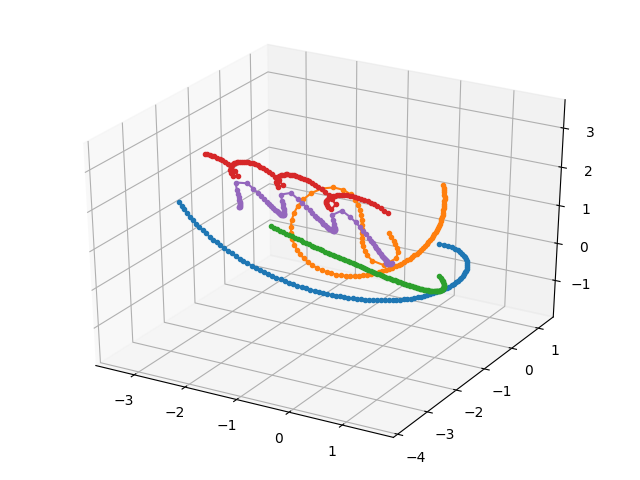

In [31]:
plot_ncuerpos_3d(rs,vs,marker='.')

<a id='fig:06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ConstantesMovimiento_31'></a><center><b>Figura 6.31.</b> </center>

Ahora podemos calcular las constantes de movimiento.  En este caso, sin embargo, la dificultad algorítmica estriba en que las posiciones y velocidades de las partículas están guardadas en las matrices `rs` y `vs` que no son triviales de manipular.  

Así, por ejemplo el momento lineal inicial de la partícula 0 esta dado por:

In [32]:
p_0_0=mus[0]*vs[0,0,:]

In [33]:
print(f"p_0_0 = {p_0_0}")

p_0_0 = [0.07294912 0.00587511 0.000171  ]


Pero si queremos el momento lineal de esa partícula en cualquier tiempo será:

In [41]:
p_0=mus[0]*vs[0,:,:]

In [42]:
print(f"p_0(t) = \n{p_0[:5]}\n...")

p_0(t) = 
[[ 0.07294912  0.00587511  0.000171  ]
 [ 0.0653799   0.00154574 -0.00381787]
 [ 0.05898078 -0.00240643 -0.0070324 ]
 [ 0.05337202 -0.00601935 -0.00963238]
 [ 0.04832467 -0.00932501 -0.0117392 ]]
...


La cuadratura de momento lineal total $C_{P_\mathrm{CM}}$ la podemos obtener si sumamos uno a uno los momentos lineales en cada tiempo de todas las partículas del sistema:

In [43]:
from numpy import zeros
C_PCM=zeros((Nt,3))
for i in range(N):
    C_PCM=C_PCM+mus[i]*vs[i,:,:]

In [44]:
print(f"C_PCM = \n{C_PCM[:5]}\n...")

C_PCM = 
[[-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]]
...


Y como vemos el valor del momento lineal es el mismo, que es lo que esperabamos de acuerdo con la teoría.  

Por otro lado la cuadratura de momento angular será:

In [47]:
from numpy import zeros,cross
C_L=zeros((Nt,3))
for i in range(N):
    C_L=C_L+mus[i]*cross(rs[i,:,:],vs[i,:,:])

In [48]:
print(f"C_PCM = \n{C_L[:5]}\n...")

C_PCM = 
[[ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685288]]
...


Que de nuevo resulta constante como esperabamos.

Finalmente la cuadratura de energía se puede calcular usando la fórmula para la energía potencial la dada por la Ec. ([ncuerpos_potencial](#mjx-eqn-eq%3Ancuerpos_potencial)):

In [49]:
from numpy import zeros
from numpy.linalg import norm

C_E=zeros(Nt)
K=zeros(Nt)
U=zeros(Nt)
for i in range(N):
    K=K+0.5*mus[i]*norm(vs[i,:,:],axis=1)**2
    for j in range(N):
        if i==j:continue
        rij=norm(rs[i,:,:]-rs[j,:,:],axis=1)
        U+=-0.5*mus[i]*mus[j]/rij
C_E=K+U

In [50]:
print(f"C_E = \n{C_E[:5]}\n...")

C_E = 
[-0.53641214 -0.53641214 -0.53641214 -0.53641214 -0.53641214]
...


Como vemos el valor de la energía es negativo, lo que podría implicar que el sistema es ligado (tal y como sugieren las trayectorias de las partículas.)  Sin embargo, como mencionamos en la [Sección *Virial*](06.03.00.00.ProblemaNCuerpos.TeoremaVirial.ipynb#virial) la condición $E<0$ es necesaria más no suficiente.  Para saber si el sistema es ligado debemos evaluar los promedios a largo plazo de las energía cinética y potencial y compararlas con la energía total:

In [51]:
E=C_E[0]
Kmean=K.mean()
Umean=U.mean()

In [52]:
print(f"-E = {-E}")
print(f"<K> = {Kmean}")
print(f"-<U>/2 = {-Umean/2}")


-E = 0.5364121422571039
<K> = 0.5201023115823993
-<U>/2 = 0.5282572686928928


Como vemos la identidad $\langle K\rangle=-E=-\langle U\rangle/2$ se cumple aproximadamente para la ventana de tiempo en la que estudiamos el sistema y podríamos sospechar que es estable.

El lector puede escoger otro valor de la semilla en el Alg. ([ncuerpos_constantes_condiciones_iniciales](#code:ncuerpos_constantes_condiciones_iniciales)) y correr nuevamente esta libreta para ver si el sistema resultante es ligado o no.  También puede cambiar el valor del tiempo de integración para verificar si la supuesta estabilidad se mantiene a largo plazo.